**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Open the files with specified encoding
with open('drive/MyDrive/projects8semester/projectWithAsif/dataset/test.ft.txt/test.ft.txt', 'r', encoding='utf-8') as f1, \
     open('drive/MyDrive/projects8semester/projectWithAsif/dataset/train.ft.txt/train.ft.txt', 'r', encoding='utf-8') as f2:
    test = f1.readlines()
    train = f2.readlines()

In [ ]:
import random

**dataset Selection**

In [ ]:
train_10000 = random.choices(train, k=1000000)
test_10000 = random.choices(test,k=100000)

**Data Exploration and Preprocessing** This code snippet explores the dataset by printing the number of samples in the training and test sets. It then preprocesses the data by removing the leading "label" from the labels and newline characters from the text.

In [ ]:
train_X, train_y = [], []
space_index = 10
for line in train_10000:
    train_X.append(line[space_index+1:])
    train_y.append(line[:space_index])

test_X, test_y = [], []
for line in train_10000:
    test_X.append(line[space_index+1:])
    test_y.append(line[:space_index])

In [ ]:
print(len(train_y))
print(len(test_y))

1000000
1000000


In [ ]:
test_y = ["negative" if label == '__label__1' else 'positive' for label in test_y]
train_y = ["negative" if label == '__label__1' else 'positive' for label in train_y]

This cell calculates and visualizes the distribution of sentiment labels in the dataset using a countplot.

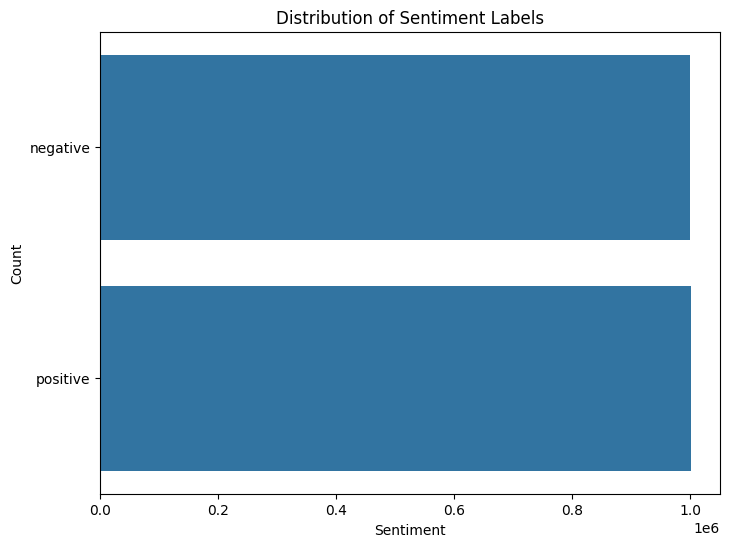

In [ ]:
# Additional Data Exploration
# Calculate the distribution of sentiment labels in the training and test sets
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate train and test labels for visualization
all_labels = train_y + test_y

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(all_labels)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**Feature Engineering**
In this cell, we use TF-IDF vectorization to convert the text data into numerical features. We initialize a TfidfVectorizer and than used to it on testing and training data .

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
test_X = vectorizer.fit_transform(test_X)
train_X = vectorizer.transform(train_X)
print("Shape of TF-IDF matrix for training data:", train_X.shape)
print("Shape of TF-IDF matrix for test data:", test_X.shape)

Shape of TF-IDF matrix for training data: (1000000, 412031)
Shape of TF-IDF matrix for test data: (1000000, 412031)


**Model Building and Evalution**   we build a logistic regression model and train it on the TF-IDF transformed training data. We then evaluate the model's performance on the test data by calculating accuracy


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(train_X, train_y)
preds = clf.predict(test_X)

Following cell computes and plots the ROC curve along with the Area Under the Curve (AUC) score.

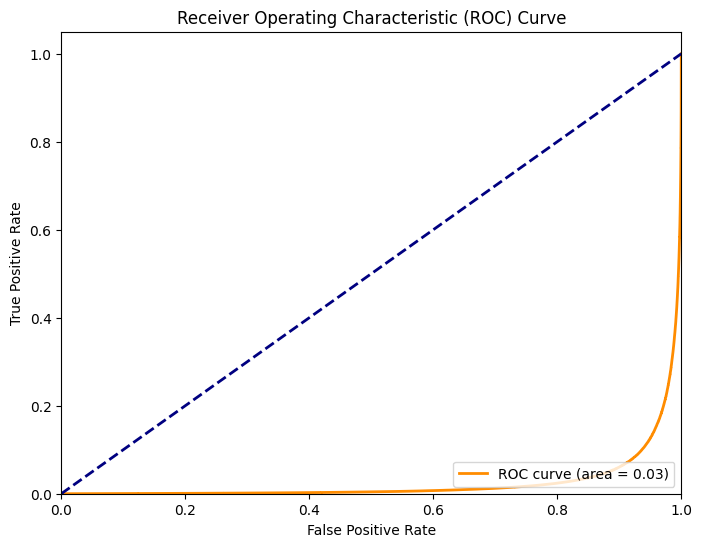

In [ ]:
# ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class
probs = clf.predict_proba(test_X)[:, 1]

test_y_binary = [1 if label == 'negative' else 0 for label in test_y]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y_binary, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Following cell generates a classification report and a confusion matrix to evaluate the model's performance in more detail.



Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.92      0.92    499867
    positive       0.92      0.92      0.92    500133

    accuracy                           0.92   1000000
   macro avg       0.92      0.92      0.92   1000000
weighted avg       0.92      0.92      0.92   1000000



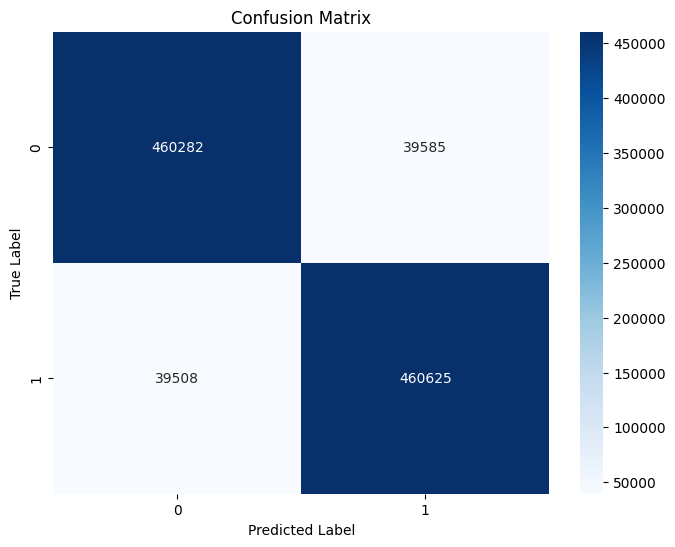

In [ ]:
# Model Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(test_y, preds))

# Generate confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, preds), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Model Deployment
# You can deploy the trained model for real-world use, such as predicting sentiment on new data.
# For example:
new_text = ["This product is amazing! Highly recommended.",
            "I'm really disappointed with the quality of this product."]

# Preprocess the new data
new_text_preprocessed = [text.strip() for text in new_text]

# Transform the new data using the TF-IDF vectorizer
new_text_tfidf = vectorizer.transform(new_text_preprocessed)

# Predict sentiment on the new data
new_predictions = clf.predict(new_text_tfidf)

# Print the predicted sentiment for each new sample
for text, prediction in zip(new_text, new_predictions):
    print("Text:", text)
    print("Predicted Sentiment:", prediction)
    print()


Text: This product is amazing! Highly recommended.
Predicted Sentiment: positive

Text: I'm really disappointed with the quality of this product.
Predicted Sentiment: negative

